# AIML Capstone Project - Autonomous Driving - Lee Thornquist

# Part 2

### 2.1 Preliminary data inspection and cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv('/Users/leethornquist/Desktop/AI:ML Caltech Bootcamp/Foundations/07 - Capstone/Autonomous Driving/Capstone 1 - Autonomous Driving/Part 2/Tesla - Deaths.csv')
df

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294,2022,1/17/2023,USA,CA,Tesla crashes into back of semi,1,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/htt...,https://web.archive.org/web/20221222203930/htt...,https://web.archive.org/web/20230118162813/htt...,NaN,NaN,NaN,NaN,NaN
1,293,2022,1/7/2023,Canada,-,Tesla crashes,1,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/htt...,https://web.archive.org/web/20221222203930/htt...,https://web.archive.org/web/20230109041434/htt...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292,2022,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/htt...,https://web.archive.org/web/20221222203930/htt...,https://web.archive.org/web/20230107232745/htt...,NaN,NaN,NaN,NaN,NaN
3,291,2022,12/22/2022,USA,GA,Tesla crashes and burns,1,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/htt...,https://web.archive.org/web/20221222203930/htt...,https://web.archive.org/web/20221222203930/htt...,NaN,NaN,NaN,NaN,NaN
4,290,2022,12/19/2022,Canada,-,Tesla crashes into storefront,1,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/htt...,https://web.archive.org/web/20221223203725/htt...,https://web.archive.org/web/20221223203725/htt...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,5,2014,7/14/2014,USA,CA,Tesla kills motorcyclist,1,-,-,1,...,-,-,https://web.archive.org/web/20220817120807/htt...,https://web.archive.org/web/20220817120807/htt...,https://web.archive.org/web/20220817120807/htt...,NaN,NaN,NaN,NaN,NaN
290,4,2014,7/4/2014,USA,CA,Thief crashes stolen Tesla,1,1,-,-,...,-,-,https://web.archive.org/web/20220817120839/htt...,https://web.archive.org/web/20220817120839/htt...,https://web.archive.org/web/20220817120839/htt...,NaN,Joshua Slot,NaN,NaN,NaN
291,3,2014,7/4/2014,USA,CA,Tesla rear ends stopped car,3,-,-,3,...,-,-,https://web.archive.org/web/20220412004559/htt...,https://web.archive.org/web/20220412004559/htt...,https://web.archive.org/web/20220412004559/htt...,NaN,NaN,NaN,NaN,NaN
292,2,2013,11/2/2013,USA,CA,Tesla kills cyclist,1,-,-,-,...,-,-,https://web.archive.org/web/20220817121049/htt...,https://web.archive.org/web/20220817121049/htt...,https://web.archive.org/web/20220817121049/htt...,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                294 non-null    int64  
 1   Year                                                                  294 non-null    int64  
 2   Date                                                                  294 non-null    object 
 3    Country                                                              294 non-null    object 
 4    State                                                                294 non-null    object 
 5    Description                                                          294 non-null    object 
 6    Deaths                                                               294 non-null    int64  
 7  

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Case #                                                                    0
Year                                                                      0
Date                                                                      0
 Country                                                                  0
 State                                                                    0
 Description                                                              0
 Deaths                                                                   0
 Tesla driver                                                             5
 Tesla occupant                                                           9
 Other vehicle                                                            4
 Cyclists/ Peds                                                           3
 TSLA+cycl / peds                                                         2
 Model                                                                    0
 Autopilot c

In [5]:
# Clean column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

In [6]:
# Remove columns with excessive missing values and irrelevant columns
df = df.drop(columns=['Source', 'Unnamed: 16', 'Unnamed: 17', 'Note', 'Deceased 1', 'Deceased 2', 'Deceased 3', 'Deceased 4'])

In [7]:
#checking ot make sure they were removed
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
0,294,2022,1/17/2023,USA,CA,Tesla crashes into back of semi,1,1,-,-,-,1,-,-,-,-
1,293,2022,1/7/2023,Canada,-,Tesla crashes,1,1,-,-,-,1,-,-,-,-
2,292,2022,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1,-,1,-,-,1,-,-,-,-
3,291,2022,12/22/2022,USA,GA,Tesla crashes and burns,1,1,-,-,-,1,-,-,-,-
4,290,2022,12/19/2022,Canada,-,Tesla crashes into storefront,1,-,-,-,1,1,-,-,-,-


In [8]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f'Duplicate rows: {duplicate_rows}')

Duplicate rows: 0


In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Case #                                                              294 non-null    int64 
 1   Year                                                                294 non-null    int64 
 2   Date                                                                294 non-null    object
 3   Country                                                             294 non-null    object
 4   State                                                               294 non-null    object
 5   Description                                                         294 non-null    object
 6   Deaths                                                              294 non-null    int64 
 7   Tesla driver              

In [11]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [12]:
# List of columns to convert to Int64
columns_to_convert = [
    'Tesla occupant',
    'Other vehicle', 
    'Cyclists/ Peds', 
    'TSLA+cycl / peds', 
    'Verified Tesla Autopilot Deaths', 
    'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'
]

# Convert columns to float64
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Convert the columns from float64 to Int64 and fill NaN with 0
for column in columns_to_convert:
    df[column] = df[column].astype('Int64').fillna(0)

# Verify the changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Case #                                                              294 non-null    int64         
 1   Year                                                                294 non-null    int64         
 2   Date                                                                294 non-null    datetime64[ns]
 3   Country                                                             294 non-null    object        
 4   State                                                               294 non-null    object        
 5   Description                                                         294 non-null    object        
 6   Deaths                                                    

In [13]:
# Convert Tesla driver column to integer (1 if driver died, 0 if driver lived)
df['Tesla driver'] = df['Tesla driver'].apply(lambda x: 1 if x == '1' else 0)
df['Autopilot claimed'] = df['Autopilot claimed'].apply(lambda x: 1 if x == '1' else 0)

In [14]:
# checking to make sure everything converted correctly
df

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
0,294,2022,2023-01-17,USA,CA,Tesla crashes into back of semi,1,1,0,0,0,1,-,0,0,0
1,293,2022,2023-01-07,Canada,-,Tesla crashes,1,1,0,0,0,1,-,0,0,0
2,292,2022,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1,0,1,0,0,1,-,0,0,0
3,291,2022,2022-12-22,USA,GA,Tesla crashes and burns,1,1,0,0,0,1,-,0,0,0
4,290,2022,2022-12-19,Canada,-,Tesla crashes into storefront,1,0,0,0,1,1,-,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,5,2014,2014-07-14,USA,CA,Tesla kills motorcyclist,1,0,0,1,0,0,-,0,0,0
290,4,2014,2014-07-04,USA,CA,Thief crashes stolen Tesla,1,1,0,0,0,1,-,0,0,0
291,3,2014,2014-07-04,USA,CA,Tesla rear ends stopped car,3,0,0,3,0,0,-,0,0,0
292,2,2013,2013-11-02,USA,CA,Tesla kills cyclist,1,0,0,0,1,1,-,0,0,0


In [15]:
# Find unique values in the 'Model' column
unique_models = df['Model'].unique()

# Display the unique values
print(unique_models)


[' - ' ' Y ' '1' '2' '3' ' S ' ' X ']


In [16]:
# Convert Model column to category
df['Model'] = df['Model'].astype('category')

# Replace ' - ' with NaN
df['Model'] = df['Model'].replace(' - ', np.nan)

# Verify the change
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Case #                                                              294 non-null    int64         
 1   Year                                                                294 non-null    int64         
 2   Date                                                                294 non-null    datetime64[ns]
 3   Country                                                             294 non-null    object        
 4   State                                                               294 non-null    object        
 5   Description                                                         294 non-null    object        
 6   Deaths                                                    

In [17]:
# Get the count of each unique value in the 'Model' column, including NaN
model_counts = df['Model'].value_counts(dropna=False)

# Display the counts of each unique value, including NaN
print(model_counts)

# Sum the occurrences of all unique values, including NaN
total_model_count = model_counts.sum()
print(f'Total count of all unique values in the Model column, including NaN: {total_model_count}')


Model
NaN    181
 S      45
3       39
 X      17
 Y      10
1        1
2        1
Name: count, dtype: int64
Total count of all unique values in the Model column, including NaN: 294


In [18]:
# Convert State and Country columns to category
df['State'] = df['State'].astype('category')
df['Country'] = df['Country'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Case #                                                              294 non-null    int64         
 1   Year                                                                294 non-null    int64         
 2   Date                                                                294 non-null    datetime64[ns]
 3   Country                                                             294 non-null    category      
 4   State                                                               294 non-null    category      
 5   Description                                                         294 non-null    object        
 6   Deaths                                                    

In [19]:
print(df['Country'].unique())

[' USA ', ' Canada ', ' China ', ' Mexico ', ' UK ', ..., ' Austria ', ' Ukraine ', ' Spain ', ' Holland ', ' Japan ']
Length: 23
Categories (23, object): [' Australia ', ' Austria ', ' Belgium ', ' Canada ', ..., ' Taiwan ', ' UK ', ' USA ', ' Ukraine ']


In [20]:
print(df['State'].unique())

['CA', '-', 'WA', 'GA', 'MO', ..., ' IN ', ' DE ', ' NH ', ' TN ', ' HI ']
Length: 43
Categories (43, object): [' AZ ', ' CA ', ' CO ', ' DE ', ..., 'PA', 'SC', 'UT', 'WA']


In [21]:
# Save the cleaned data to a new CSV file
cleaned_file_path = '/Users/leethornquist/Desktop/AI:ML Caltech Bootcamp/Foundations/07 - Capstone/Autonomous Driving/Capstone 1 - Autonomous Driving/Part 2/Tesla_Deaths_Cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

## 2.2 Exploratory Data Analysis

### a. Perform an in-depth exploratory data analysis on the number of events by date, per year, and per day for each state and country

In [22]:
df = pd.read_csv('/Users/leethornquist/Desktop/AI:ML Caltech Bootcamp/Foundations/07 - Capstone/Autonomous Driving/Capstone 1 - Autonomous Driving/Part 2/Tesla_Deaths_Cleaned.csv')

In [23]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert State and Country columns to category
df['State'] = df['State'].astype('category')
df['Country'] = df['Country'].astype('category')

# Convert Model column to category
df['Model'] = df['Model'].astype('category')

# Replace ' - ' with NaN
df['Model'] = df['Model'].replace(' - ', np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Case #                                                              294 non-null    int64         
 1   Year                                                                294 non-null    int64         
 2   Date                                                                294 non-null    datetime64[ns]
 3   Country                                                             294 non-null    category      
 4   State                                                               294 non-null    category      
 5   Description                                                         294 non-null    object        
 6   Deaths                                                    

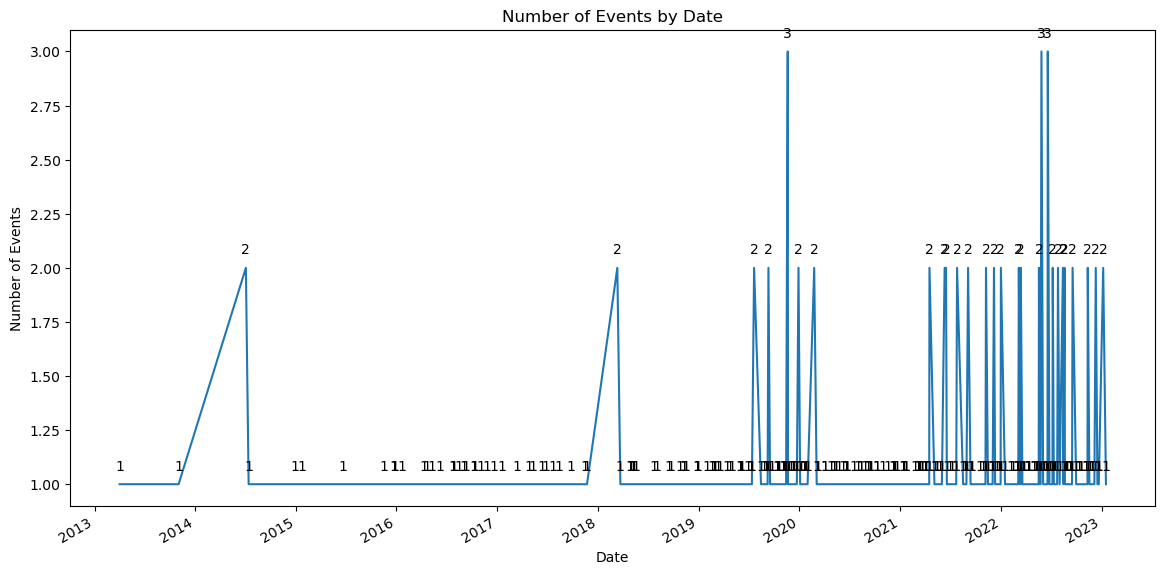

In [24]:
# Plot number of events by date
plt.figure(figsize=(14, 7))
events_by_date = df['Date'].value_counts().sort_index()
events_by_date.plot(kind='line')
plt.title('Number of Events by Date')
plt.xlabel('Date')
plt.ylabel('Number of Events')

# Annotate the plot
for i, value in enumerate(events_by_date):
    plt.annotate(value, (events_by_date.index[i], value), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


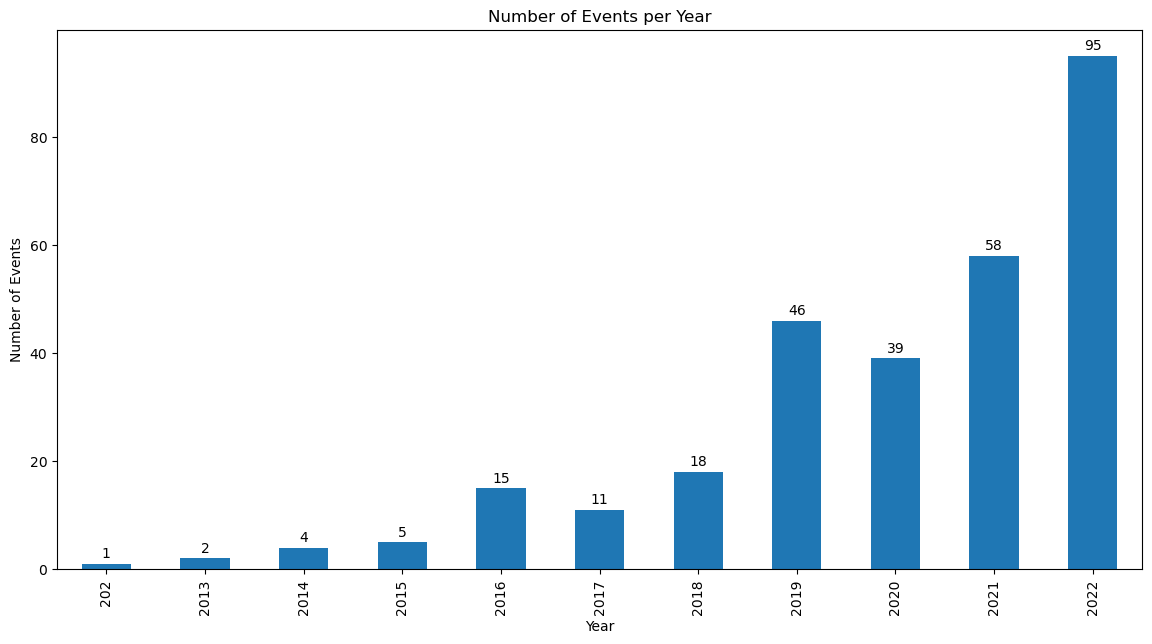

In [25]:
# Plot number of events per year
plt.figure(figsize=(14, 7))
events_per_year = df['Year'].value_counts().sort_index()
events_per_year.plot(kind='bar')
plt.title('Number of Events per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')

# Annotate the plot
for i, value in enumerate(events_per_year):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


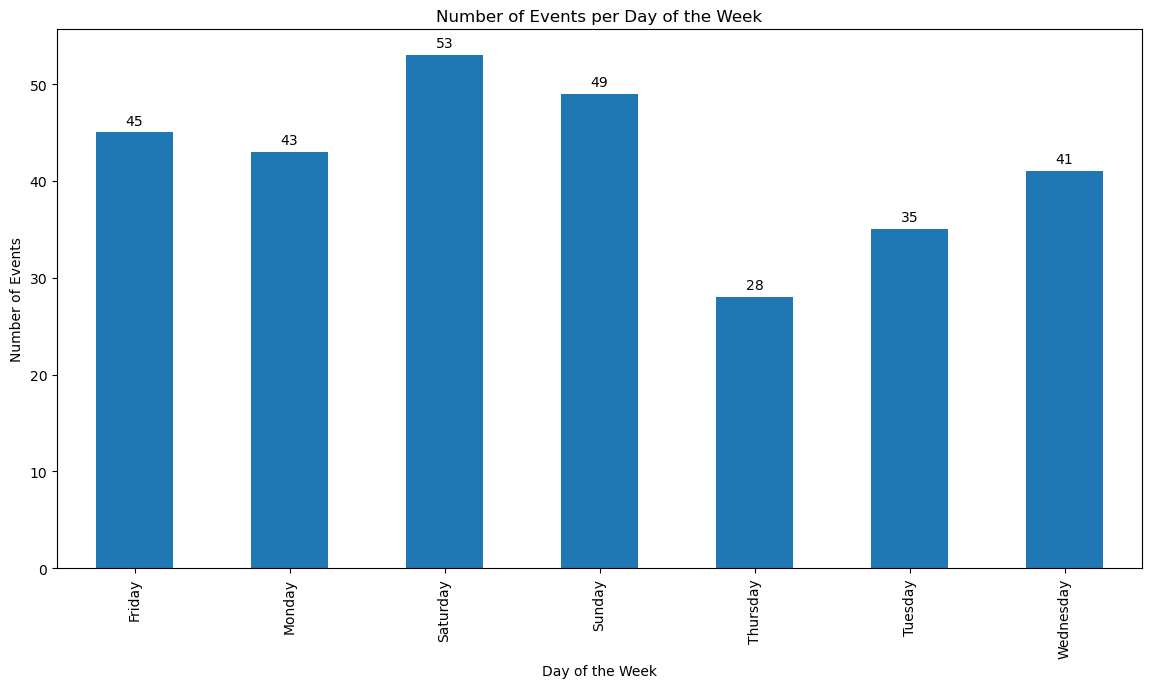

In [27]:
# Extract day of the week from Date and create DayOfWeek column
df['DayOfWeek'] = df['Date'].dt.day_name()

# Plot number of events per day of the week
plt.figure(figsize=(14, 7))
events_per_dayofweek = df['DayOfWeek'].value_counts().sort_index()
events_per_dayofweek.plot(kind='bar')
plt.title('Number of Events per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')

# Annotate the plot
for i, value in enumerate(events_per_dayofweek):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


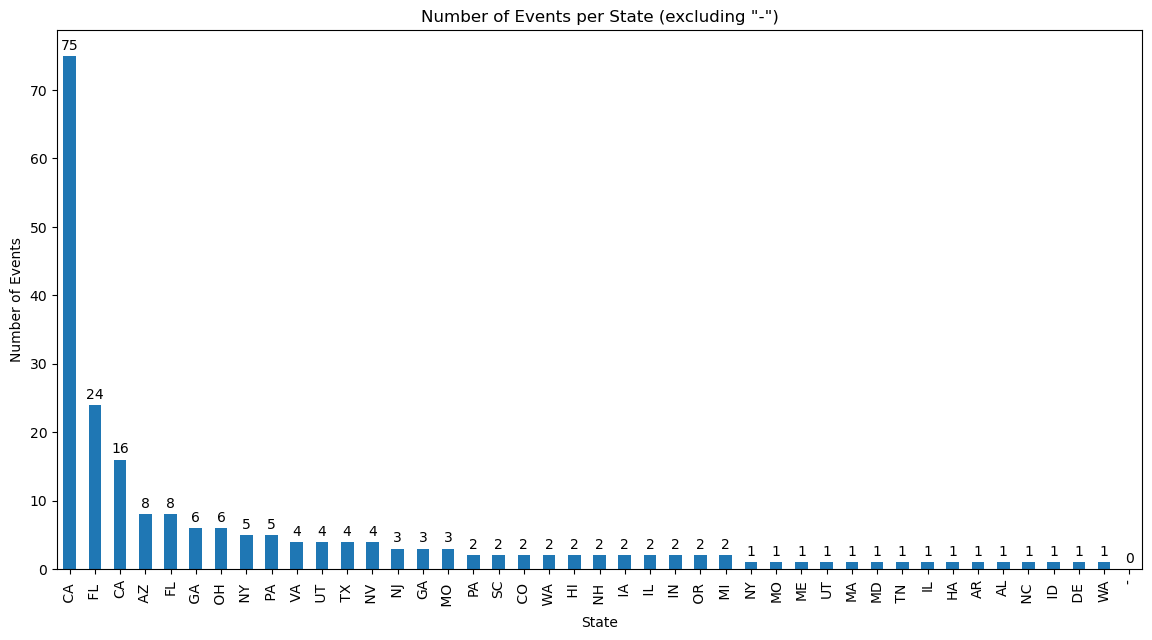

In [28]:
# Filter out rows where State is '-'
df_filtered = df[df['State'] != '-']

# Plot number of events per state excluding '-'
plt.figure(figsize=(14, 7))
events_per_state_filtered = df_filtered['State'].value_counts()
events_per_state_filtered.plot(kind='bar')
plt.title('Number of Events per State (excluding "-")')
plt.xlabel('State')
plt.ylabel('Number of Events')

# Annotate the plot
for i, value in enumerate(events_per_state_filtered):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


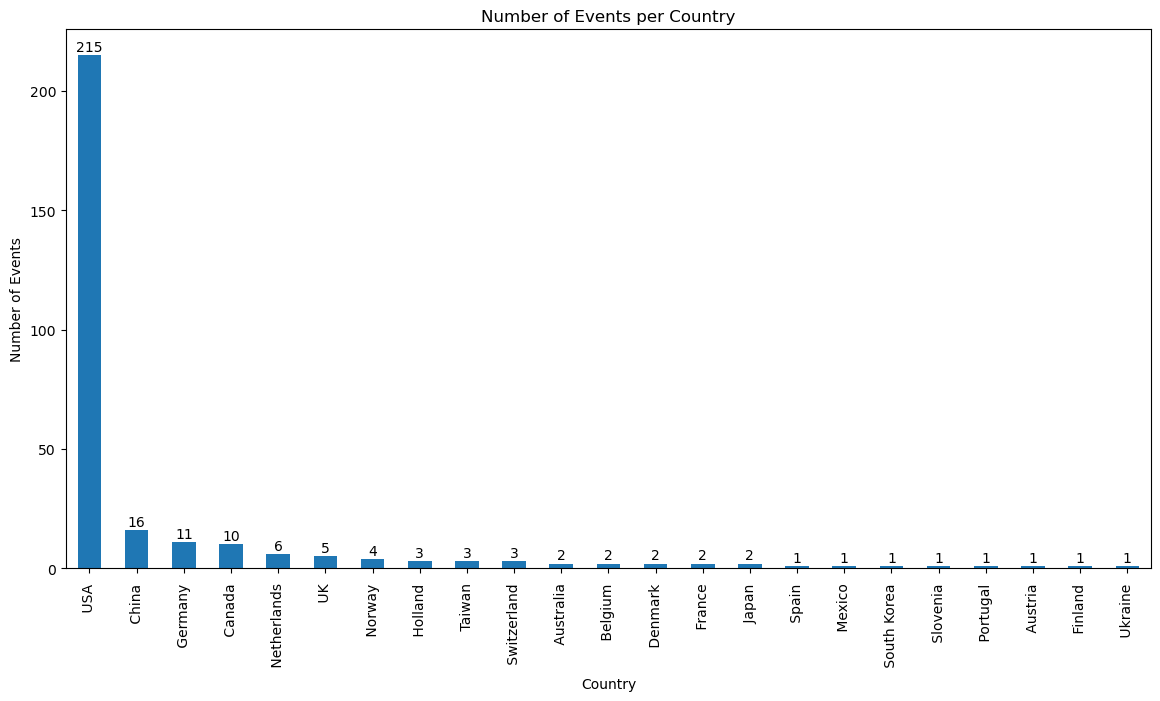

In [29]:
# Plot number of events per country
plt.figure(figsize=(14, 7))
events_per_country = df['Country'].value_counts()
events_per_country.plot(kind='bar')
plt.title('Number of Events per Country')
plt.xlabel('Country')
plt.ylabel('Number of Events')

# Annotate the plot
for i, value in enumerate(events_per_country):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


### b. Analyze the different aspects of the death events

#### What is the number of victims (deaths) in each accident?

In [30]:
# Distribution of number of deaths in each accident
deaths_distribution = df['Deaths'].value_counts().sort_index()
print(deaths_distribution)

Deaths
1    247
2     38
3      6
4      3
Name: count, dtype: int64


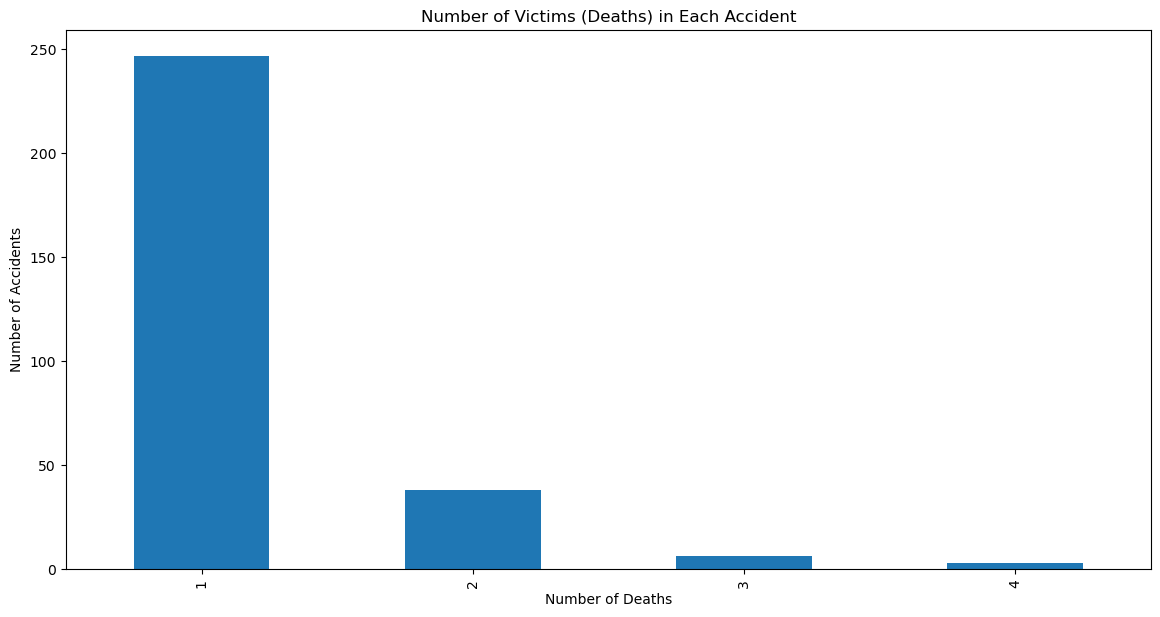

In [31]:
# Plot the distribution
plt.figure(figsize=(14, 7))
deaths_distribution.plot(kind='bar')
plt.title('Number of Victims (Deaths) in Each Accident')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of Accidents')
plt.show()

#### How many times did tesla drivers die?

In [32]:
# Number of times Tesla drivers died
tesla_driver_deaths = df['Tesla driver'].sum()
print(f'Tesla drivers died in {tesla_driver_deaths} accidents.')

Tesla drivers died in 117 accidents.


#### What is the proportion of events in which one or more occupants died?

In [33]:
# Proportion of events with one or more Tesla occupants dying
occupant_death_events = (df['Tesla occupant'] > 0).sum()
total_events = len(df)
occupant_death_proportion = occupant_death_events / total_events
print(f'Proportion of events with one or more occupants dying: {occupant_death_proportion:.2%}')


Proportion of events with one or more occupants dying: 14.63%


#### What is the distribution of events in which the vehicle hit a cyclist or a pedestrian?

In [34]:
# Distribution of events involving hitting a cyclist or pedestrian
cyclist_ped_events = df['Cyclists/ Peds'].value_counts().sort_index()
print(cyclist_ped_events)

Cyclists/ Peds
0    250
1     42
2      2
Name: count, dtype: int64


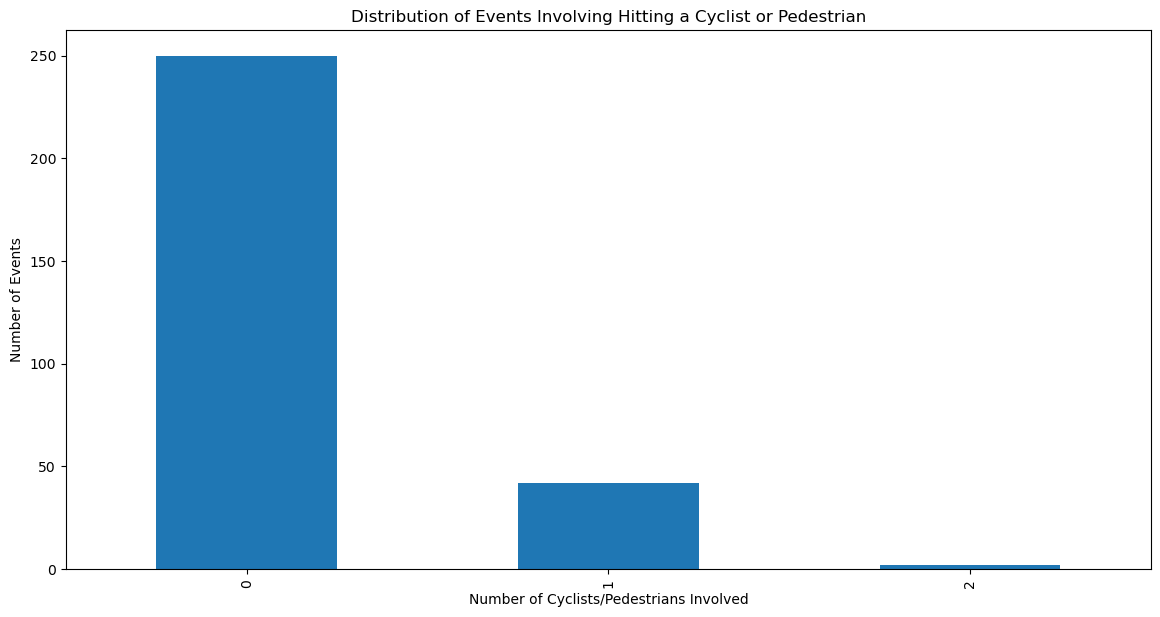

In [35]:
# Plot the distribution
plt.figure(figsize=(14, 7))
cyclist_ped_events.plot(kind='bar')
plt.title('Distribution of Events Involving Hitting a Cyclist or Pedestrian')
plt.xlabel('Number of Cyclists/Pedestrians Involved')
plt.ylabel('Number of Events')
plt.show()

#### How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian?

In [36]:
# Number of events with Tesla driver or occupant deaths along with cyclist/pedestrian deaths
joint_death_events = df[(df['Tesla driver'] > 0) | (df['Tesla occupant'] > 0) & (df['Cyclists/ Peds'] > 0)].shape[0]
print(f'Number of accidents involving deaths of Tesla occupants/drivers and cyclists/pedestrians: {joint_death_events}')


Number of accidents involving deaths of Tesla occupants/drivers and cyclists/pedestrians: 118


#### What is the frequency of Tesla colliding with other vehicles?

In [37]:
# Frequency of Tesla colliding with other vehicles
collision_with_other_vehicles = (df['Other vehicle'] > 0).sum()
print(f'Number of accidents involving collision with other vehicles: {collision_with_other_vehicles}')


Number of accidents involving collision with other vehicles: 110


### C. Study the event distribution across models

In [38]:
# Count the number of events for each model
events_per_model = df['Model'].value_counts().sort_index()
print(events_per_model)

# important note that there are 181 missing values in the model column, so I am choosing not to show them in this distribution 

Model
 S     45
 X     17
 Y     10
1       1
2       1
3      39
Name: count, dtype: int64


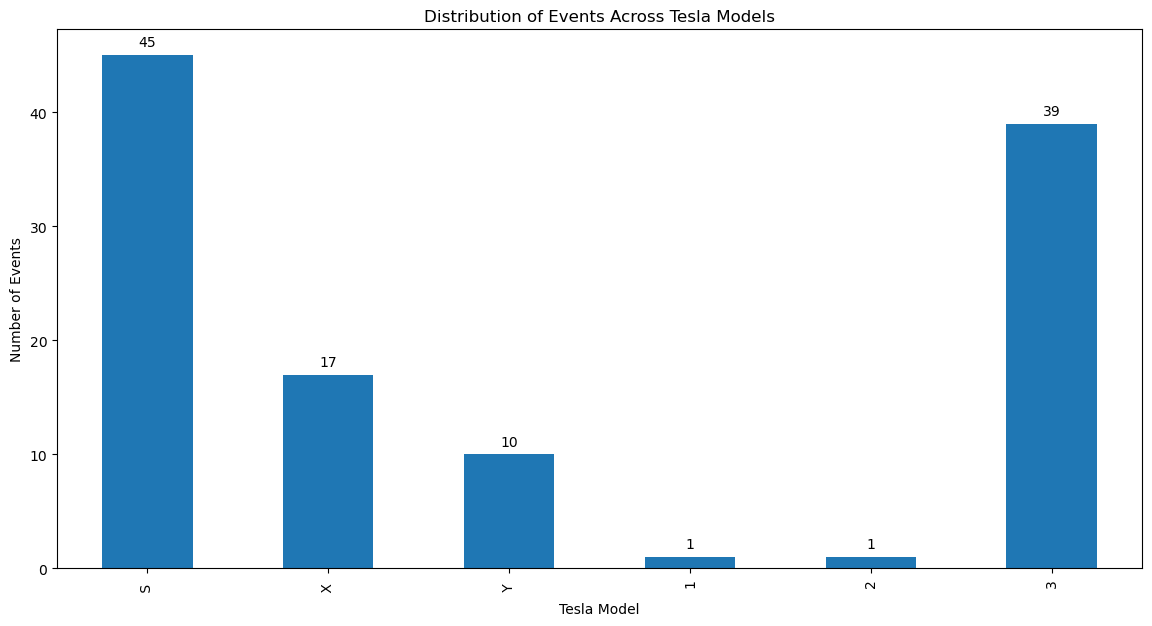

In [39]:
# Plot the distribution of accidents across models
plt.figure(figsize=(14, 7))
events_per_model.plot(kind='bar')
plt.title('Distribution of Events Across Tesla Models')
plt.xlabel('Tesla Model')
plt.ylabel('Number of Events')

# Annotate the plot
for i, value in enumerate(events_per_model):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


#### Showing the number of deaths per model

Model
 S     53
 X     19
 Y     13
1       1
2       1
3      47
Name: Deaths, dtype: int64


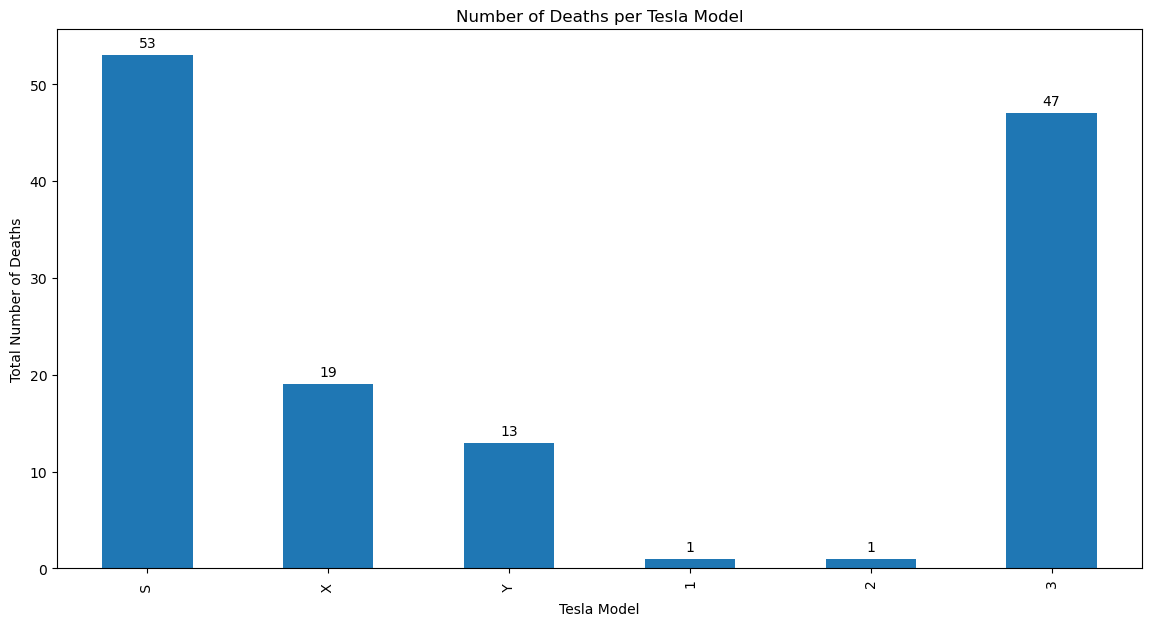

In [40]:
# Aggregate the number of deaths per model
deaths_per_model = df.groupby('Model')['Deaths'].sum().sort_index()
print(deaths_per_model)

# Plot the number of deaths per model
plt.figure(figsize=(14, 7))
deaths_per_model.plot(kind='bar')
plt.title('Number of Deaths per Tesla Model')
plt.xlabel('Tesla Model')
plt.ylabel('Total Number of Deaths')

# Annotate the plot
for i, value in enumerate(deaths_per_model):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


#### Showing the Proportion of Events Involving Driver/Occupant Deaths per Model

Model
 S     0.444444
 X     0.294118
 Y     0.200000
1      1.000000
2      1.000000
3      0.538462
dtype: float64


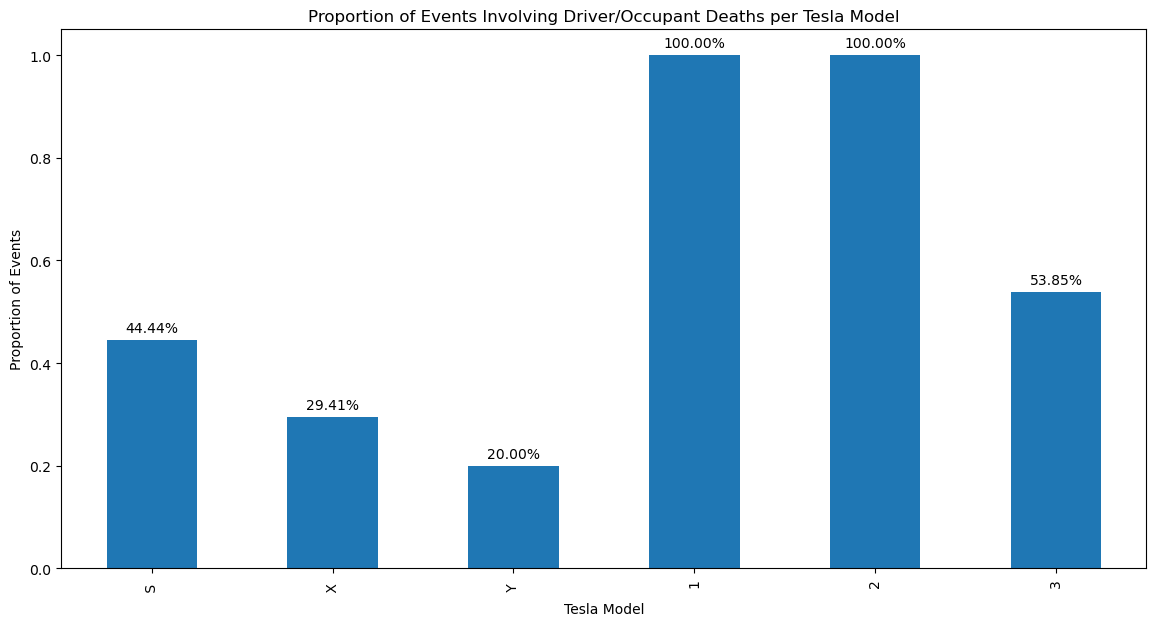

In [41]:
# Calculate the proportion of events involving driver/occupant deaths per model
death_events_per_model = df.groupby('Model').apply(lambda x: ((x['Tesla driver'] > 0) | (x['Tesla occupant'] > 0)).mean()).sort_index()
print(death_events_per_model)

# Plot the proportion of events involving driver/occupant deaths per model
plt.figure(figsize=(14, 7))
death_events_per_model.plot(kind='bar')
plt.title('Proportion of Events Involving Driver/Occupant Deaths per Tesla Model')
plt.xlabel('Tesla Model')
plt.ylabel('Proportion of Events')

# Annotate the plot
for i, value in enumerate(death_events_per_model):
    plt.text(i, value + 0.01, f'{value:.2%}', ha='center', va='bottom')

plt.show()


### D. Check the distribution of verified Tesla autopilot deaths

In [42]:
# Count the number of verified Tesla autopilot deaths
autopilot_deaths_count = df['Verified Tesla Autopilot Deaths'].value_counts(dropna=False).sort_index()
print(autopilot_deaths_count)


Verified Tesla Autopilot Deaths
0    278
1     13
2      3
Name: count, dtype: int64


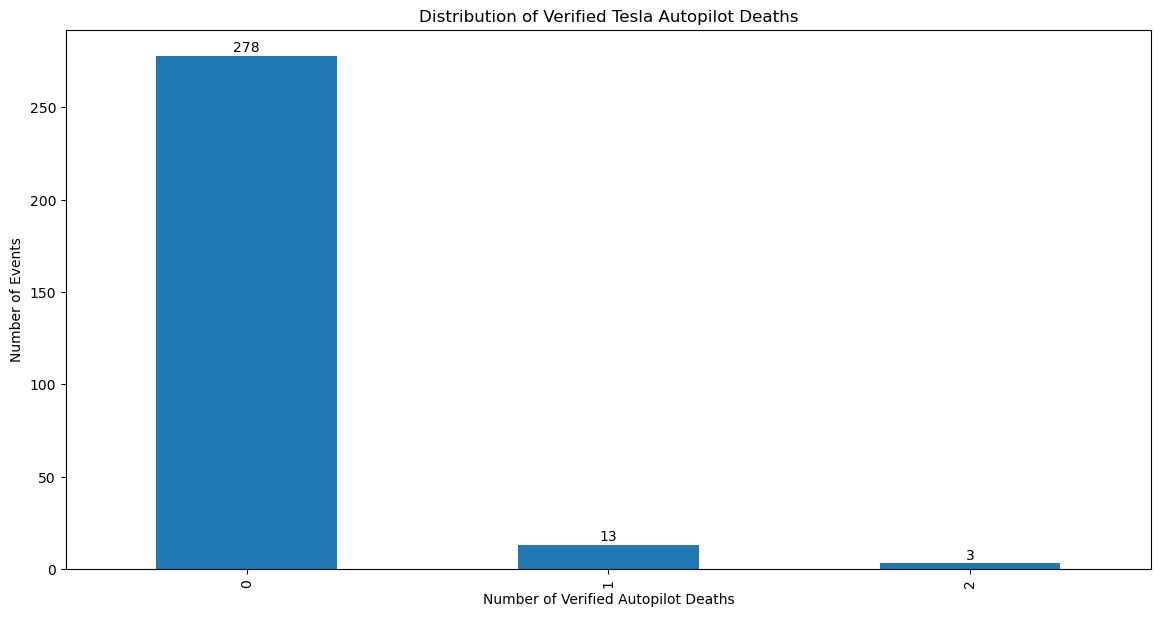

In [43]:
# Plot the distribution of verified Tesla autopilot deaths
plt.figure(figsize=(14, 7))
autopilot_deaths_count.plot(kind='bar')
plt.title('Distribution of Verified Tesla Autopilot Deaths')
plt.xlabel('Number of Verified Autopilot Deaths')
plt.ylabel('Number of Events')

# Annotate the plot
for i, value in enumerate(autopilot_deaths_count):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


The above shows us that there are only a few verified autopilot deaths. Most of them were not verified (0).